In [1]:
import os
import zipfile
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers 
from keras.layers import Conv3D, MaxPool3D, Flatten, Dense

model_name = "PE_classification_224_160_48_1_4_c.h5"

# Folder "nr_128_64" consist of CT scans having normal lung tissue or other lung disease

normal_scan_paths2 = [
    os.path.join(os.getcwd(), "C:/Users/85298/AI/PE0415/val/nr", x)
    for x in os.listdir("C:/Users/85298/AI/PE0415/val/nr")
]
# Folder "pe_128_64" consist of CT scans having Pulmonary embolism,

abnormal_scan_paths2 = [
    os.path.join(os.getcwd(),"C:/Users/85298/AI/PE0415/val/pe", x)
    for x in os.listdir("C:/Users/85298/AI/PE0415/val/pe")
]

print("CT scans with normal lung tissue: " + str(len(normal_scan_paths2)))
print("CT scans with abnormal lung tissue: " + str(len(abnormal_scan_paths2)))


####################################################

import nibabel as nib

from scipy import ndimage


def read_nifti_file(filepath):
#   Read and load volume
    # Read file
    scan = nib.load(filepath)
    # Get raw data
    scan = scan.get_fdata()
    return scan


abnormal_scans2 = np.array([read_nifti_file(path) for path in abnormal_scan_paths2])
normal_scans2 = np.array([read_nifti_file(path) for path in normal_scan_paths2])

nr100 = round(len(normal_scan_paths2)  )
pe100 = round(len(abnormal_scan_paths2)   )


#print("nr70%:",nr70,"nr30%",nr30)
#print("pe70%:",pe70,"pe30%:",pe30)

# For the CT scans having Pulmonary embolism
# assign 1, for the normal and other disease ones assign 0.
abnormal_labels2 = np.array([1 for _ in range(len(abnormal_scans2))])
normal_labels2 = np.array([0 for _ in range(len(normal_scans2))])

# Split data in the ratio 70-30 for training and validation.
x_train2 = np.concatenate((abnormal_scans2[:pe100], normal_scans2[:nr100]), axis=0)
y_train2 = np.concatenate((abnormal_labels2[:pe100], normal_labels2[:nr100]), axis=0)
x_val2 = np.concatenate((abnormal_scans2[pe100:], normal_scans2[nr100:]), axis=0)
y_val2 = np.concatenate((abnormal_labels2[pe100:], normal_labels2[nr100:]), axis=0)
print(
    "Number of samples in train and validation are %d and %d."
    % (x_train2.shape[0], x_val2.shape[0])
)


CT scans with normal lung tissue: 27
CT scans with abnormal lung tissue: 13
Number of samples in train and validation are 40 and 0.


In [2]:
from keras.utils import np_utils
from keras.layers import Conv3D, MaxPool3D, Flatten, Dense
from keras.layers import Dropout, Input, BatchNormalization
from sklearn.metrics import confusion_matrix, accuracy_score
from keras.losses import binary_crossentropy
from keras.optimizers import Adadelta, SGD
from matplotlib.pyplot import cm
import matplotlib.pyplot as plt
from keras.models import Model
import cv2
import time
import os
import numpy as np
import keras
import h5py
import numpy as np
from keras import regularizers
import os
import glob
import cv2
import random
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, roc_auc_score
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, CSVLogger, EarlyStopping, ReduceLROnPlateau
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras import optimizers
from keras.utils import to_categorical, plot_model
from keras.layers import Dense, Input, Conv2D, Flatten, MaxPooling2D, Activation
from keras.models import Model, Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from keras.applications.vgg16 import VGG16
from keras.models import load_model
from keras.utils import np_utils
from keras import backend as K
from keras.models import load_model
import keras
import tensorflow as tf

def get_model():
    
    input_layer = Input((224, 160, 48, 1))
    
    conv_layer1 = Conv3D(filters=128, kernel_size=(3, 3, 3), activation='relu')(input_layer)
    pooling_layer1 = MaxPool3D(pool_size=(2, 2, 2))(conv_layer1)
    pooling_layer1 = BatchNormalization()(pooling_layer1) 
#    pooling_layer1 = Dropout(0.5)(pooling_layer1)  
    
    
    conv_layer2 = Conv3D(filters=256, kernel_size=(3, 3, 3), activation='relu')(pooling_layer1)
    pooling_layer2 = MaxPool3D(pool_size=(2, 2, 2))(conv_layer2)
    pooling_layer2 = BatchNormalization()(pooling_layer2)  
#    pooling_layer2 = Dropout(0.5)(pooling_layer2)
    
    conv_layer3 = Conv3D(filters=512, kernel_size=(3, 3, 3), activation='relu')(pooling_layer2)
    pooling_layer3 = MaxPool3D(pool_size=(2, 2, 2))(conv_layer3)
    pooling_layer3 = BatchNormalization()(pooling_layer3)
#    pooling_layer3 = Dropout(0.5)(pooling_layer3)
    
    conv_layer4 = Conv3D(filters=1024, kernel_size=(3, 3, 3), activation='relu')(pooling_layer3)
    pooling_layer4 = MaxPool3D(pool_size=(2, 2, 2))(conv_layer4)
    pooling_layer4 = BatchNormalization()(pooling_layer4)
#    pooling_layer4 = Dropout(0.5)(pooling_layer4)
    
    flatten_layer = Flatten()(pooling_layer4)
    

    dense_layer4 = Dense(units=2048, activation='relu')( flatten_layer)
    dense_layer4 = Dropout(0.4)(dense_layer4)
    
    
    dense_layer5 = Dense(units=1024, activation='relu')(dense_layer4)
    dense_layer5 = Dropout(0.4)(dense_layer5)
    
    output_layer = Dense(units=1, activation="sigmoid")(dense_layer5)
    

    model = Model(inputs=input_layer, outputs=output_layer, name="3dcnn")

    
    return model

model = None
model = get_model()
model.summary()

Model: "3dcnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 160, 48, 1)  0         
                             ]                                   
                                                                 
 conv3d (Conv3D)             (None, 222, 158, 46, 128  3584      
                             )                                   
                                                                 
 max_pooling3d (MaxPooling3D  (None, 111, 79, 23, 128)  0        
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 111, 79, 23, 128)  512      
 ormalization)                                                   
                                                                 
 conv3d_1 (Conv3D)           (None, 109, 77, 21, 256)  884992

In [3]:
import warnings 
warnings.simplefilter(action='ignore',category=FutureWarning)

In [4]:
import numpy as np
import pandas as pd
import csv
from keras.models import load_model

df_label = pd.read_csv('C:/Users/85298/AI/CT_image/202304/label_cut_d.csv' , sep=',')
y=df_label.set_index("ID3", inplace = True)


df_out = pd.DataFrame(columns = ["ID","Disease","Label","predict", "actual"])
df_out2 = pd.DataFrame(columns = ["predict", "actual"])

len_nr = len(normal_scan_paths2)
len_pe = len(abnormal_scan_paths2)


for patient in range (0,len(y_train2)):

#for patient in range (0,20):
    
    if patient < len_pe:
    
        file_path = abnormal_scan_paths2[patient]
    
    else :
        
        file_path = normal_scan_paths2 [patient-len_pe]
        
    ID = file_path.split("_") [2]


    
    Disease = df_label.loc[int(ID)]["Disease"]    

    Label = df_label.loc[int(ID)]["Label"] 
    

    

# Load best weights.


    model.load_weights(model_name)
    prediction = model.predict(np.expand_dims(x_train2[patient], axis=0))[0]
    label_1 = y_train2[patient]
    
    scores = [1 - prediction[0], prediction[0]]
 #   print(label_1)
     
    prediction_score = round(prediction[0] *100,2)
    prediction_score2 = prediction[0] *100
        
    df_out = df_out.append({"ID": ID,"Disease":Disease,"Label":Label ,'predict' : prediction_score , 'actual' : label_1 },
        ignore_index = True)

    df_out2 = df_out2.append({'predict' : prediction_score2 , 'actual' : label_1 },
        ignore_index = True)
    
    
print(df_out)    


    
    

                
    
        




1/1 [==============================] - 0s 15ms/step
      ID                                Disease  Label  predict actual
0   1010                                     PE     PE    44.33      1
1   2000                             Chronic PE     PE    46.80      1
2   3010                                     PE     PE    34.74      1
3   4000             Pulmonary embolism present     PE    32.76      1
4   4003             Pulmonary embolism present     PE    35.63      1
5   4004             Pulmonary embolism present     PE    53.27      1
6   4019             Pulmonary embolism present     PE    33.50      1
7   4036             Chronic pulmonary embolism     PE    23.17      1
8   4048             Pulmonary embolism present     PE    31.76      1
9   4049             Chronic pulmonary embolism     PE    21.34      1
10  4050             Chronic pulmonary embolism     PE    37.00      1
11  5021  Non diagnostic for pulmonary embolism     PE    32.43      1
12  6031                 

In [5]:
import numpy as np
import pandas as pd
import csv
from keras.models import load_model

for i in np.arange (1,99,1):
    
    i = round(i,2)

    TP = 0
    FP = 0
    TN = 0
    FN = 0


    for patient in range (0,len(df_out)):
    

        if (df_out["predict"].iloc[patient] > i) & (df_out["actual"].iloc[patient] == 1) :
            TP = TP + 1
        if (df_out["predict"].iloc[patient] > i) & (df_out["actual"].iloc[patient] == 0) :
            FP = FP + 1
        if (df_out["predict"].iloc[patient] < i) & (df_out["actual"].iloc[patient] == 0) :
            TN = TN + 1
        if (df_out["predict"].iloc[patient] < i) & (df_out["actual"].iloc[patient] == 1) :
            FN = FN + 1        
        

    Precision = TP/(TP+FP)

    Recall = TP/(TP+FN)

    F1_score = ((Precision*Recall)/(Precision+Recall))*2

    Accuracy = (TP+TN)/(TP+FP+TN+FN)
    print(str(i))
    print ("Precision",Precision,"Recall",Recall,"F1_score",F1_score,"Accuracy",Accuracy)
    print (TP,FP,TN,FN)           



1
Precision 0.325 Recall 1.0 F1_score 0.4905660377358491 Accuracy 0.325
13 27 0 0
2
Precision 0.325 Recall 1.0 F1_score 0.4905660377358491 Accuracy 0.325
13 27 0 0
3
Precision 0.325 Recall 1.0 F1_score 0.4905660377358491 Accuracy 0.325
13 27 0 0
4
Precision 0.325 Recall 1.0 F1_score 0.4905660377358491 Accuracy 0.325
13 27 0 0
5
Precision 0.325 Recall 1.0 F1_score 0.4905660377358491 Accuracy 0.325
13 27 0 0
6
Precision 0.325 Recall 1.0 F1_score 0.4905660377358491 Accuracy 0.325
13 27 0 0
7
Precision 0.325 Recall 1.0 F1_score 0.4905660377358491 Accuracy 0.325
13 27 0 0
8
Precision 0.325 Recall 1.0 F1_score 0.4905660377358491 Accuracy 0.325
13 27 0 0
9
Precision 0.3333333333333333 Recall 1.0 F1_score 0.5 Accuracy 0.35
13 26 1 0
10
Precision 0.3333333333333333 Recall 1.0 F1_score 0.5 Accuracy 0.35
13 26 1 0
11
Precision 0.3333333333333333 Recall 1.0 F1_score 0.5 Accuracy 0.35
13 26 1 0
12
Precision 0.34210526315789475 Recall 1.0 F1_score 0.5098039215686275 Accuracy 0.375
13 25 2 0
13
Preci

ZeroDivisionError: division by zero

In [6]:
import numpy as np
import pandas as pd
import csv
from keras.models import load_model

for i in np.arange (30,31,1):
    
    i = round(i,2)

    TP = 0
    FP = 0
    TN = 0
    FN = 0


    for patient in range (0,len(df_out)):
    

        if (df_out["predict"].iloc[patient] > i) & (df_out["actual"].iloc[patient] == 1) :
            TP = TP + 1
        if (df_out["predict"].iloc[patient] > i) & (df_out["actual"].iloc[patient] == 0) :
            FP = FP + 1
        if (df_out["predict"].iloc[patient] < i) & (df_out["actual"].iloc[patient] == 0) :
            TN = TN + 1
        if (df_out["predict"].iloc[patient] < i) & (df_out["actual"].iloc[patient] == 1) :
            FN = FN + 1        
        

    Precision = TP/(TP+FP)

    Recall = TP/(TP+FN)

    F1_score = ((Precision*Recall)/(Precision+Recall))*2

    Accuracy = (TP+TN)/(TP+FP+TN+FN)
    print(str(i))
    print ("Precision",Precision,"Recall",Recall,"F1_score",F1_score,"Accuracy",Accuracy)
    print (TP,FP,TN,FN)           

30
Precision 0.55 Recall 0.8461538461538461 F1_score 0.6666666666666667 Accuracy 0.725
11 9 18 2


Text(0.5, 192.72222222222217, 'Predicted')

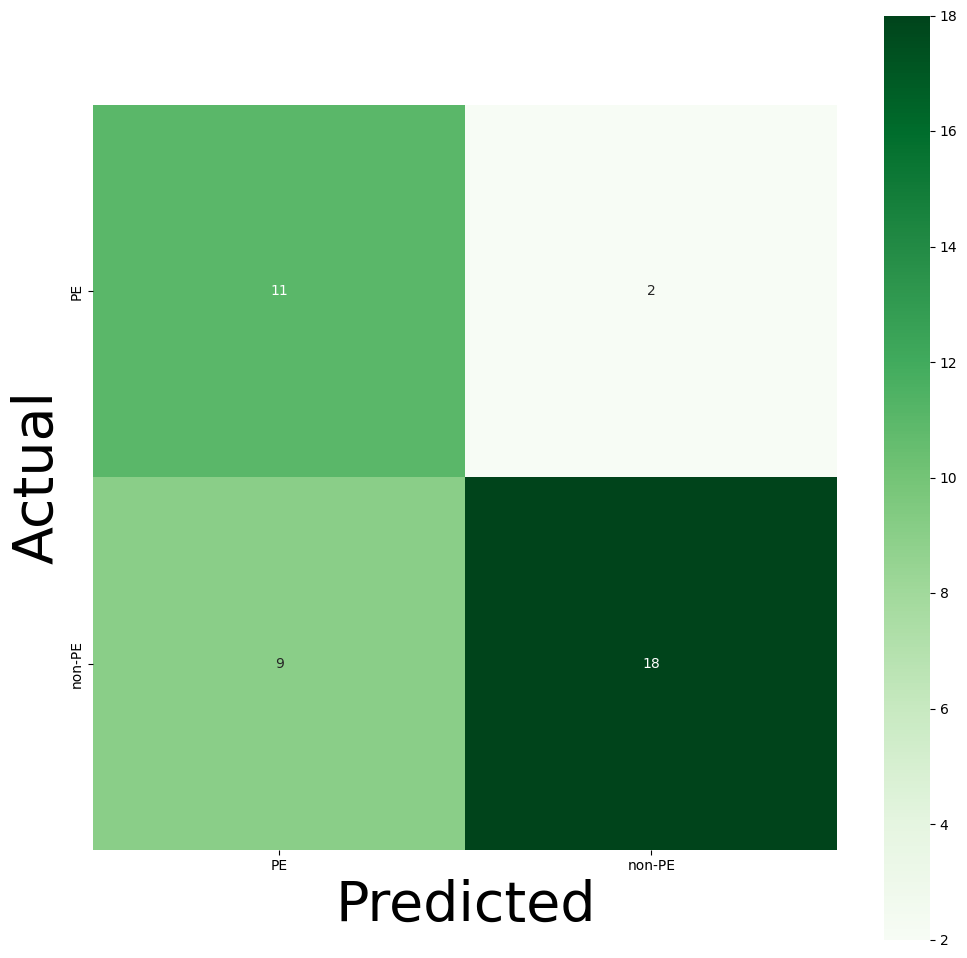

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
#Y_pred = model.predict(x_val)
disease_types=['PE', 'non-PE']



#Y_pred = np.argmax(Y_pred, axis=1)
#Y_true = y_val
#Y_true = np.argmax(y_val,axis=1)
#print (Y_pred)
#print (Y_true)
#cm = confusion_matrix(Y_true, Y_pred)

cm = [[TP,FN],[FP,TN]]

plt.figure(figsize=(12, 12))
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, xticklabels=disease_types, yticklabels=disease_types)
ax.set_ylabel('Actual', fontsize=40)
ax.set_xlabel('Predicted', fontsize=40)

[0.         0.         0.14814815 0.14814815 0.18518519 0.18518519
 0.22222222 0.22222222 0.25925926 0.25925926 0.2962963  0.2962963
 0.33333333 0.33333333 0.62962963 0.62962963 0.66666667 0.66666667
 1.        ] [0.         0.07692308 0.07692308 0.15384615 0.15384615 0.30769231
 0.30769231 0.53846154 0.53846154 0.69230769 0.69230769 0.76923077
 0.76923077 0.84615385 0.84615385 0.92307692 0.92307692 1.
 1.        ] [54.26724648 53.26724648 49.57755208 47.82621562 46.91941142 44.331339
 39.82427716 34.74152088 33.54438245 32.7581346  32.62849152 32.4255228
 32.35637844 31.75700903 24.67721254 23.17485511 22.95961082 21.33597732
  8.33700746]


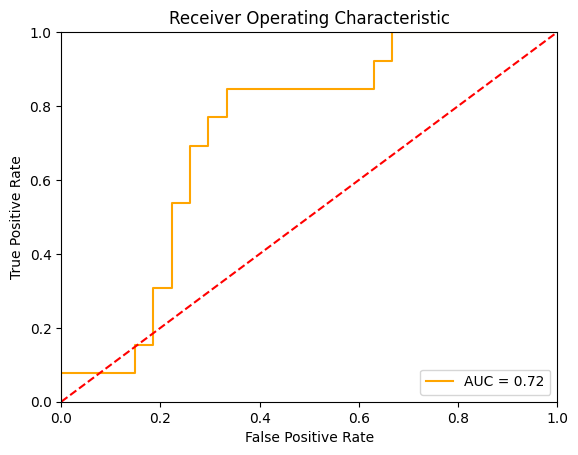

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc

# 讀取資料
import pandas as pd
#df=pd.read_csv('./AUC.csv')

# 在各種『決策門檻』（decision threshold）下，計算 『真陽率』（True Positive Rate；TPR）與『假陽率』（False Positive Rate；FPR）
fpr, tpr, threshold = roc_curve(df_out2['actual'], df_out2['predict'])
print(fpr, tpr, threshold)

auc1 = auc(fpr, tpr)
## Plot the result
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()  